<a href="https://colab.research.google.com/github/DerekLeeCS/FreqML/blob/master/Assignment 2/Derek_Lee_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cancer Dataset taken from http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
# Iris Dataset taken from http://archive.ics.uci.edu/ml/datasets/Iris

import requests

url = "https://raw.githubusercontent.com/DerekLeeCS/FreqML/master/Assignment%202/irisTrain.txt"
r = requests.get(url, allow_redirects=True)
open('train.txt', 'wb').write(r.content)

url = "https://raw.githubusercontent.com/DerekLeeCS/FreqML/master/Assignment%202/irisValid.txt"
r = requests.get(url, allow_redirects=True)
open('valid.txt', 'wb').write(r.content)

url = "https://raw.githubusercontent.com/DerekLeeCS/FreqML/master/Assignment%202/irisTest.txt"
r = requests.get(url, allow_redirects=True)
open('test.txt', 'wb').write(r.content)

324

# Modules and Constants

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression

alpha = 0.1     # Alpha Value
N = 79          # Rows in training data
n = 11          # Rows in test data
p = 4           # Attributes

# Linspace Values
instances = 25  # Number of theta values tested
minRange = 0    # Start point
maxRange = 2    # End point

# Functions

In [ ]:
def loadFile(f,x,y):
    f1 = f.readlines()

    row = 0
    for line in f1:
        tempList = line.split(',')  # Separates the data

        if tempList[-1] == 'Iris-setosa\n':
            y[row] = 0
        elif tempList[-1] == 'Iris-versicolor\n':
            y[row] = 1
        else:
            raise Exception("Invalid output in file.")

        tempList.insert(0,1)        # First element of input vector is 1
        x[row] = tempList[:-1]  
        row += 1


# Hypothesis function
def h(theta,x):
    z = np.dot(theta.transpose(),x)
    return 1 / (1 + np.exp(-z))


# Calculates values for yHat
def predictValues(yHat,x,theta):
    for i in range(0,len(yHat)):
        if np.dot(theta.transpose(),x[i]) >= 0:
            yHat[i] = 1
        else:
            yHat[i] = 0


# Calculates % correct
def percentCorrect(y,yHat):
    size = len(y)

    correct = 0
    for i in range (0,size):
        if y[i] == yHat[i]:
            correct += 1

    return correct/size * 100


# Calculates log likelihood for a given theta
def logLikelihood(y,x,theta):
    logLike = 0
    for i in range(0,len(y)):
        logLike += ( y[i] * np.log10(h(theta,x[i])) ) + ( (1-y[i]) * np.log10(1-h(theta,x[i])) )
    return logLike

#Part A (SGD w/o Regularization)
---



In [ ]:
def main():
    theta = np.zeros( (p+1,1) )

    # Train
    with open('train.txt', 'r') as f:
       
        # Initializing input and output matrices
        xTrain = np.zeros( (N,p+1) )
        yTrain = np.zeros( (N,1) )
        
        loadFile(f,xTrain,yTrain)

        # Stochastic Gradient Descent
        for i in range(0,N):
            for j in range(0,p+1):
                theta[j] = theta[j] + alpha * ( yTrain[i] - h(theta,xTrain[i]) ) * xTrain[i][j]


        # Testing Scikit
        logreg = LogisticRegression()
        logreg.fit(xTrain, yTrain)
        

    # Test
    with open('test.txt', 'r') as f:
       
        # Initializing input and output matrices
        xTest = np.zeros( (n,p+1) )
        yTest = np.zeros( (n,1) )
        yHat = np.zeros( (n,1) )
        loadFile(f,xTest,yTest)

        # Testing model
        predictValues(yHat,xTest,theta)
        percent = percentCorrect(yTest,yHat)
        print("My Model: ",end="")
        print(percent,end="%\n")
        
        # Testing Scikit model
        y_pred = logreg.predict(xTest)
        print("Scikit Model: ",end="")
        print(logreg.score(xTest, yTest)*100,end="%\n")


main()

My Model: 100.0%
Scikit Model: 100.0%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Part B (SGD w/ Regularization)
---
The best lambda value is 0, so SGD w/o Regularization and SGD w/ Regularization both converge to the same point.
<br><br>
If the lambda value was greater than 0: <br>
SGD w/o Regularization converges to a higher likelihood than SGD w/ Regularization. Regularization helps to make the model more generalizable, by discouraging overfitting. However, this means it will usually perform worse on the Training dataset.


My Model: 100.0%


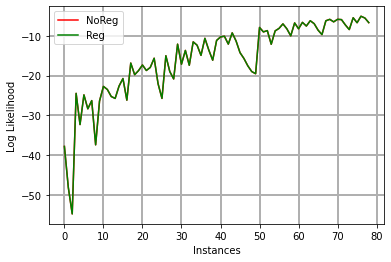

In [ ]:
def main():
    lamb = np.linspace(minRange,maxRange,instances)   
    thetaNoReg = np.zeros( (p+1,1) )
    logLikeNoReg = np.zeros( (N,1) )            
    thetaReg = np.zeros( (instances,p+1) )
    logLikeReg = np.zeros( (instances,N) )

    # Train
    with open('train.txt', 'r') as f:
       
        # Initializing input and output matrices
        xTrain = np.zeros( (N,p+1) )
        yTrain = np.zeros( (N,1) )
        loadFile(f,xTrain,yTrain)
        

        # Stochastic Gradient Descent without Regularization
        for i in range(0,N):
            for j in range(0,p+1):
                thetaNoReg[j] = thetaNoReg[j] + alpha * ( yTrain[i] - h(thetaNoReg,xTrain[i]) ) * xTrain[i][j]
           
            # Log Likelihood without Regularization
            logLikeNoReg[i] = logLikelihood(yTrain,xTrain,thetaNoReg)


        # Stochastic Gradient Descent with Regularization
        # Formula taken from http://timroughgarden.org/s16/l/l6.pdf
        for k in range(0,instances):
            for i in range(0,N):
                for j in range(0,p+1):
                    thetaReg[k][j] = thetaReg[k][j] + alpha * ( ( yTrain[i] - h(thetaReg[k],xTrain[i]) ) * xTrain[i][j] - 2*lamb[k] * thetaReg[k][j] )

                # Log Likelihood without Regularization
                logLikeReg[k][i] = logLikelihood(yTrain,xTrain,thetaReg[k])
                
                    
    # Validation (Choosing lambda)
    with open('valid.txt', 'r') as f:

        # Initializing input and output matrices
        xValid = np.zeros( (n,p+1) )
        yValid = np.zeros( (n,1) )
        yHat = np.zeros( (instances,n) )
        loadFile(f,xValid,yValid)

        for i in range(0,instances):
            predictValues( yHat[i],xValid,thetaReg[i] )
        
        # Calculating percent correct
        percent = np.zeros( (instances,1) )
        for i in range(0,instances):
            percent[i] = percentCorrect(yValid,yHat[i])

        # Finding optimal lambda
        index = np.where(percent == np.amax(percent))
        index = random.choice(index[0])  # Chooses a random index if multiple indices have the same maximum percent correct
        bestTheta = thetaReg[index]
        bestLogLikeReg = logLikeReg[index]


    # Test
    with open('test.txt', 'r') as f:
       
        # Initializing input and output matrices
        xTest = np.zeros( (n,p+1) )
        yTest = np.zeros( (n,1) )
        yHat = np.zeros( (n,1) )
        loadFile(f,xTest,yTest)

        # Testing model
        predictValues(yHat,xTest,bestTheta)
        percent = percentCorrect(yTest,yHat)
        print("My Model: ",end="")
        print(percent,end="%\n")


    # Plot
    plt.figure()
    plt.plot(logLikeNoReg,color='r',label='NoReg')
    plt.plot(bestLogLikeReg,color='g',label='Reg')
    plt.grid(linestyle='-', linewidth=2)
    plt.xlabel('Instances')
    plt.ylabel('Log Likelihood')
    plt.legend()

    
        
main()

# Cancer Code



```
N = 455         # Rows in training data
n = 57          # Rows in test data
p = 30          # Attributes


# Loads data from file f into input and output matrices x and y
def loadFile(f,x,y):
    f1 = f.readlines()

    row = 0
    for line in f1:
        tempList = line.split(',')  # Separates the data
        tempList.pop(0)             # Removes first element (Patient ID)

        if tempList[0] == 'B':
            y[row] = 0
        elif tempList[0] == 'M':
            y[row] = 1
        else:
            raise Exception("Invalid output in file.")

        tempList[0] = 1             # First element of input vector is 1
        x[row] = tempList[0]  
        row += 1
```

# Iris Code

```
N = 79          # Rows in training data
n = 11          # Rows in test data
p = 4           # Attributes


def loadFile(f,x,y):
    f1 = f.readlines()

    row = 0
    for line in f1:
        tempList = line.split(',')  # Separates the data

        if tempList[-1] == 'Iris-setosa\n':
            y[row] = 0
        elif tempList[-1] == 'Iris-versicolor\n':
            y[row] = 1
        else:
            raise Exception("Invalid output in file.")

        tempList.insert(0,1)        # First element of input vector is 1
        x[row] = tempList[:-1]  
        row += 1
```